# Read JSON files

do premennej `graphsRaw` sa nacitaju vsetky grafy z datasetu

`graphRaw`:
  - `filename`: nazov .lua suboru z ktoreho je vytvoreny
  - `isTest`: 1 ak sa subor nachadzal v `test` adresari, inak 0
  - `isSpec`: 1 ak sa subor nachadzal v `spec` adresari, inak 0
  - `isShebang`: 1 ak boli prve 2 znaky v subore '#!', inak 0
  - `nodes`: DataFrame(columns=\['id', 'type'\])
  - `edges`: DataFrame(columns=\['from', 'to'\])



In [ ]:
import os
import pandas as pd
import json
from tqdm.notebook import tnrange # loading bar

graphsRaw = []

dataPath = '../data'
dirs = os.listdir(dataPath)
nDirs = len(dirs)

for i in tnrange(nDirs, desc='Dataset loading'):
    dirname = dirs[i]
    dirPath = dataPath + '/' + dirname
    for filename in os.listdir(dirPath):
        json_file = dirPath + '/' + filename
        with open(json_file) as jf:
            graph = {}
            try:
                jsonData = json.load(jf)
                graph['filename'] = jsonData['_filename']
                graph['path'] = jsonData['_path']
                graph['isTest'] = int(jsonData['_isTest'])
                graph['isSpec'] = int(jsonData['_isSpec'])
                graph['isShebang'] = int(jsonData['_isShebang'])
                graph['nodes'] = pd.DataFrame(jsonData['nodes'], columns=['id', 'type'])
                graph['nodes'] = graph['nodes'].set_index('id')
                graph['edges'] = pd.DataFrame(jsonData['edges'], columns=['from', 'to'])
                graphsRaw.append(graph)
            except:
                print(f'Wrong json file: {json_file}')

In [313]:
[gr['path'] for gr in graphsRaw if gr['isSpec'] == 0]
#[gr['path'] for gr in graphsRaw if gr['isTest'] == 1]
#[gr['path'] for gr in graphsRaw if gr['isShebang'] == 1]

['modules/30log/30log.lua',
 'modules/30log/30logclean.lua',
 'modules/30log/30logglobal.lua',
 'modules/30log/performance/tests.lua',
 'modules/abelhas/examples/cool.lua',
 'modules/abelhas/examples/gnuplot.lua',
 'modules/abelhas/examples/param1.lua',
 'modules/abelhas/pso.lua',
 'modules/abelhas/examples/schwefel7.lua',
 'modules/abelhas/examples/test.lua',
 'modules/alien/src/alien.lua',
 'modules/alien/samples/gtk.lua',
 'modules/alien/samples/libc.lua',
 'modules/alien/samples/string_array.lua',
 'modules/alien/tests/test_alien.lua',
 'modules/alt-getopt/alt_getopt.lua',
 'modules/ansicolors/ansicolors.lua',
 'modules/asklua/ask.lua',
 'modules/asklua/example/mininum.lua',
 'modules/asklua/example/mininum_test.lua',
 'modules/basexx/lib/basexx.lua',
 'modules/basexx/test/base_spec.lua',
 'modules/bencode/bencode.lua',
 'modules/bencode/tests/compare.lua',
 'modules/bencode/examples/dumptorrent.lua',
 'modules/bencode/tests/neg_int.lua',
 'modules/bencode/tests/runtests.lua',
 'mo

# OneHot

kazdemu grafu z `graphsRaw` sa prida atribut `encNodeTypes` (OneHot kodovanie typov uzlov)
- `encNodeTypes` je DataFrame OneHot kodovani pre vsetky uzly v danom grafe
- **typy uzlov**: *\['require container', 'function', 'local variable', 'file', 'tableconstructor', 'module', 'statement:keyword', 'variable container', 'statement:numericfor', 'statement:genericfor', 'statement:if', 'global function', 'statement:functioncall', 'statement:assign', 'function container', 'statement:localassign', 'global variable', 'statement:globalfunction', 'statement:while', 'statement:localfunction', 'interface container', 'interface', 'require local variable', 'statement:do', 'statement:repeat'\]*
- ostatne typy uzlov sa ignoruju

In [3]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ntypes = [
    'require container', 'function', 'local variable', 'file', 
    'tableconstructor', 'module', 'statement:keyword', 
    'variable container', 'statement:numericfor', 'statement:genericfor', 
    'statement:if', 'global function', 'statement:functioncall', 
    'statement:assign', 'function container', 'statement:localassign', 
    'global variable', 'statement:globalfunction', 'statement:while', 
    'statement:localfunction', 'interface container', 'interface', 
    'require local variable', 'statement:do', 'statement:repeat'
]

enc = OneHotEncoder(handle_unknown='ignore')
X = np.array(ntypes).reshape(-1,1)
enc.fit(X)

# encode all NodeTypes in graph
for gr in graphsRaw:
    encoded = enc.transform(gr['nodes']['type'].values.reshape(-1,1))
    gr['encNodeTypes'] = pd.DataFrame(encoded.toarray())

In [5]:
graphsRaw[0]['encNodeTypes']

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create dataset

dataset tvoria `graphs` a `graph_labels`
- `graphs` je list of StellarGraphs
- `graph_labels` je pandas.Series oznaceni pre dany graf na i-tej pozcii
    - `basic` => 0
    - `isShebang` => 1
    - `isSpec` => 2
  
Pozn.: do `basic` zdrojovych kodov som zaradil aj `isTest` (obycajne testy), pretoze struktury ich extrahovanych grafov su velmi podobne

In [321]:
from stellargraph import StellarGraph

def createStellarGraph(graphRaw):
    nodes = graphRaw['encNodeTypes']
    edges = graphRaw['edges']
    graph = StellarGraph(nodes=nodes, edges=edges, source_column='from', target_column='to', is_directed=True)
    return graph


graphs = [createStellarGraph(gr) for gr in graphsRaw]
#graph_labels = pd.Series([1 if gr['isShebang'] else 2 if gr['isSpec'] else 3 if gr['isTest'] else 0 for gr in graphsRaw], dtype="category", name='label')
graph_labels = pd.Series([1 if gr['isShebang'] else 2 if gr['isSpec'] else 0 for gr in graphsRaw], dtype="category", name='label')
#graph_labels = pd.Series([1 if gr['isSpec'] else 0 for gr in graphsRaw], dtype="category", name='label')
#graph_labels = pd.Series([1 if gr['isShebang'] else 0 for gr in graphsRaw], dtype="category", name='label')


## TODO to numpy array

# Dataset stats
Dataset je velmi nevyvazeny. 

Pocet `basic` zdrojovych kodov vysoko prevysuje pocty `Shebang` a `Spec` zdrojovych kodov

In [322]:
basic, shebang, spec = graph_labels.value_counts()
print(f'COUNTS\nBasic: {basic}\nShebang: {shebang}\nSpecs: {spec}')

COUNTS
Basic: 2249
Shebang: 131
Specs: 112


In [323]:
summary = pd.DataFrame(
    [(g.number_of_nodes(), g.number_of_edges()) for g in graphs],
    columns=["nodes", "edges"],
)
summary.describe().round(1)

,nodes,edges
count,2492.0,2492.0
mean,93.9,156.9
std,165.7,308.6
min,5.0,4.0
25%,20.0,24.0
50%,43.0,57.0
75%,100.0,153.0
max,2400.0,4300.0


# Outliers TODO

In [324]:
lower = summary['nodes'].quantile(0.05)
upper = summary['nodes'].quantile(0.95)

In [128]:
clipped = summary.loc[(summary['nodes'] > lower) & (summary['nodes'] < upper)]

In [129]:
clipped.describe().round(1)

,nodes,edges
count,2239.0,2239.0
mean,68.2,109.6
std,65.9,138.7
min,9.0,8.0
25%,22.5,27.0
50%,43.0,57.0
75%,90.0,136.5
max,340.0,1960.0


In [130]:
graph_labels = graph_labels.iloc[clipped.index]

# Undersampling
Z `basic` zdrojovych kodov sa nahodne vyberie mensi pocet grafov ako ich je v skutocnosti, cim sa upravi ich pomer ku grafom ostatnych tried. 

Tymto krokom sa trochu vyvazi dataset.

Pozn.: `RandomUnderSampler.fit_resample` berie ako prvy parameter a aj vracia 2-rozmerne pole, preto ho je potom treba vratit naspat do 1-rozmerneho.

In [325]:
from imblearn.under_sampling import RandomUnderSampler

u_samp_strategy = {
    0: 200,
    1: 131,
    2: 112
}

undersample = RandomUnderSampler(sampling_strategy=u_samp_strategy, random_state=1)
graphs_under, graph_labels_under = undersample.fit_resample(np.array(graphs).reshape(-1, 1), graph_labels.to_numpy())

In [334]:
graphs = graphs_under.flatten()
graph_labels = graph_labels_under

# Final (sampled) dataset stats

In [340]:
print(graphs[0].info())

StellarGraph: Directed multigraph
 Nodes: 332, Edges: 514

 Node types:
  default: [332]
    Features: float32 vector, length 25
    Edge types: default-default->default

 Edge types:
    default-default->default: [514]
        Weights: all 1 (default)
        Features: none


In [341]:
print(graphs[1].info())

StellarGraph: Directed multigraph
 Nodes: 52, Edges: 72

 Node types:
  default: [52]
    Features: float32 vector, length 25
    Edge types: default-default->default

 Edge types:
    default-default->default: [72]
        Weights: all 1 (default)
        Features: none


In [344]:
# TODO
pd.Series(graph_labels).value_counts().to_frame()

,0
0,200
1,131
2,112


In [343]:
summary = pd.DataFrame(
    [(g.number_of_nodes(), g.number_of_edges()) for g in graphs],
    columns=["nodes", "edges"],
)
summary.describe().round(1)

,nodes,edges
count,443.0,443.0
mean,88.1,183.2
std,136.8,327.9
min,5.0,4.0
25%,18.0,20.0
50%,38.0,55.0
75%,99.0,173.0
max,1244.0,2697.0


# Prepair generator
Z `graph_labels` sa vytvori OneHot encoding labelov. 

Pozn.: Generator je potrebny neskor na to, aby sa objekty typu `StellarGraph` mohli vkladat do modelu neuronovej siete z Tensorflow-u

In [345]:
graph_labels = pd.get_dummies(graph_labels, drop_first=False)

In [347]:
print(graph_labels)

     0  1  2
0    1  0  0
1    1  0  0
2    1  0  0
3    1  0  0
4    1  0  0
..  .. .. ..
438  0  0  1
439  0  0  1
440  0  0  1
441  0  0  1
442  0  0  1

[443 rows x 3 columns]


In [348]:
num_graphs, num_classes = graph_labels.shape
print(f'Number of classes: {num_classes}\nNumber of graphs: {num_graphs}')

Number of classes: 3
Number of graphs: 443


In [349]:
from stellargraph.mapper import PaddedGraphGenerator
generator = PaddedGraphGenerator(graphs=graphs)

# Supervised graph classification with GCN [StellarGraph]

In [350]:
from stellargraph.layer import GCNSupervisedGraphClassification
from sklearn import model_selection
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt

## Split dataset to TRAIN, VALIDATION and TEST
Pomer percent TRENOVACI\:VALIDACNY\:TESTOVACI == **70\:15\:15**

In [361]:
# TRAIN:TEST 85:15
train_graphs, test_graphs = model_selection.train_test_split(
    graph_labels, train_size=0.85, test_size=None, stratify=graph_labels
)

# TRAIN:VALIDATION 82.4:17.6 => 85*0.824 == 70  85*17.6 == 15 
train_graphs, val_graphs = model_selection.train_test_split(
    train_graphs, train_size=0.824, test_size=None
)

In [362]:
print(f'TRAIN GRAPHS: {len(train_graphs)}\nVALIDATION GRAPHS: {len(val_graphs)}\nTEST GRAPHS: {len(test_graphs)}')

TRAIN GRAPHS: 309
VALIDATION GRAPHS: 67
TEST GRAPHS: 67


## Create generators

In [363]:
batch_size=30
epochs = 100

train_gen = generator.flow(
        train_graphs.index, targets=graph_labels.iloc[train_graphs.index].values, batch_size=batch_size
    )
val_gen = generator.flow(
        val_graphs.index, targets=graph_labels.iloc[val_graphs.index].values, batch_size=batch_size
    )

## Create model
Model ma spolu 11 vrstiev (aj s dropout vrstvami).

In [365]:
gc_model = GCNSupervisedGraphClassification(
        layer_sizes=[64, 64],
        activations=["relu", "relu"],
        generator=generator,
        dropout=0.5,
    )

x_inp, x_out = gc_model.in_out_tensors()
predictions = Dense(units=32, activation="relu")(x_out)
predictions = Dense(units=16, activation="relu")(predictions)
predictions = Dense(num_classes, activation="softmax")(predictions)

model = Model(inputs=x_inp, outputs=predictions)
model.compile(optimizer=Adam(0.005), loss=categorical_crossentropy, metrics=["acc"])

## Train model

In [238]:
es = EarlyStopping(
    monitor="val_loss", min_delta=0, patience=25, restore_best_weights=True
)

In [242]:
history = model.fit(
        train_gen, epochs=epochs, validation_data=val_gen, verbose=1, callbacks=[es],
    )

test_metrics = model.evaluate(val_gen, verbose=0)
val_acc = test_metrics[model.metrics_names.index("acc")]

Epoch 1/100
11/11 [==============================] - 3s 198ms/step - loss: 1.0700 - acc: 0.4209 - val_loss: 1.0705 - val_acc: 0.3824
Epoch 2/100
11/11 [==============================] - 2s 242ms/step - loss: 1.0099 - acc: 0.4577 - val_loss: 1.0272 - val_acc: 0.3824
Epoch 3/100
11/11 [==============================] - 3s 222ms/step - loss: 0.9651 - acc: 0.5125 - val_loss: 1.0311 - val_acc: 0.6176
Epoch 4/100
11/11 [==============================] - 2s 187ms/step - loss: 0.9219 - acc: 0.5926 - val_loss: 0.8973 - val_acc: 0.5441
Epoch 5/100
11/11 [==============================] - 3s 213ms/step - loss: 0.7885 - acc: 0.6399 - val_loss: 0.8853 - val_acc: 0.6324
Epoch 6/100
11/11 [==============================] - 2s 207ms/step - loss: 0.7508 - acc: 0.6296 - val_loss: 0.8084 - val_acc: 0.5735
Epoch 7/100
11/11 [==============================] - 2s 210ms/step - loss: 0.6868 - acc: 0.6597 - val_loss: 0.7616 - val_acc: 0.6765
Epoch 8/100
11/11 [==============================] - 2s 215ms/step - 

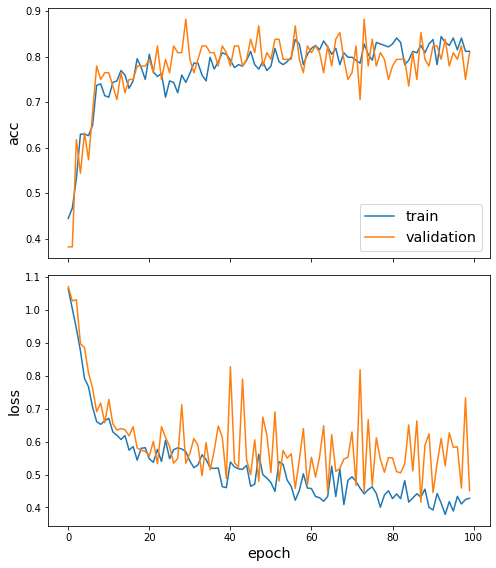

In [243]:
import stellargraph as sg
sg.utils.plot_history(history)

In [244]:
print(val_acc)

0.8088235259056091


# Evaluate on test sample

In [308]:
test_gen = generator.flow(
        test_graphs.index, targets=graph_labels.iloc[test_graphs.index].values, batch_size=1
    )

In [306]:
# CELY DATASET
test_gen = generator.flow(
        np.arange(len(graphs)), targets=graph_labels.iloc[np.arange(len(graphs))].values, batch_size=1
    )

In [309]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

67/67 [==============================] - 0s 3ms/step - loss: 0.4515 - acc: 0.8209

Test Set Metrics:
	loss: 0.4515
	acc: 0.8209


In [296]:
predicts = model.predict(test_gen)

In [297]:
Y_pred = predicts.argmax(axis=1)

In [298]:
Y = graph_labels.iloc[test_graphs.index].values.argmax(axis=1)

In [299]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y, Y_pred)

<AxesSubplot:>

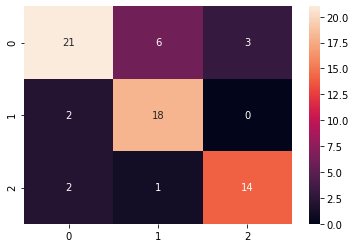

In [300]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

# Save model to local storage

In [252]:
model.save('model_3classes_undersample')

INFO:tensorflow:Assets written to: model_3classes_undersample/assets


# Unique

In [253]:
uniquelist = []
for d in graphsRaw:
    curr_list = d['nodes']['type'].unique()
    uniquelist += list(set(curr_list) - set(uniquelist))

In [254]:
print(len(uniquelist))
print(uniquelist)

36
['require container', 'function container', 'blank lines', 'statement:functioncall', 'local variable', 'interface container', 'statement:localassign', 'file', 'statement:assign', 'global function', 'global variable', 'n/a', 'interface', 'statement:if', 'variable container', 'function', 'module', 'require local variable', 'statement:genericfor', 'statement:while', 'statement:keyword', 'tableconstructor', 'statement:numericfor', 'string', 'statement:localfunction', 'unop', 'number', 'table assign node', 'symbol', 'boolean', 'statement:repeat', 'statement:globalfunction', 'keyword', 'statement:do', '_prefixexp', '_simpleexp']


# Visualize graphs

In [ ]:
from graphviz import Digraph

for _, d in enumerate(data):
  nodes_data = data[623]['nodes']
  edges_data = data[623]['edges']

  dot = Digraph(format='png')
  for index, row in nodes_data.iterrows():
    dot.node(str(row.id), str(row['type']), shape='box') # + '\n' + str(row.text)
  for index, row in edges_data.iterrows():
    dot.edge(str(row['from']), str(row['to'])) #, label=row['label']
  dot.render('graphVisualizations/' + data[623]['filename'])
  # TODO
  if _ >= 0:
    break 